<a href="https://colab.research.google.com/github/HumbertoSM-DataScience/Thermodynamics/blob/main/ListaTermo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy.optimize import curve_fit

rng = np.random.default_rng()

In [ ]:
def histograma(dados, bins):
  '''Recebe uma lista de dados, plota um histograma e retora os valores do histograma'''

# estabelece os valores de minimo e máximo e cria o espaço em x subdividido em bins (compartimentos)
  x_min = np.min(dados)
  x_max = np.max(dados)
  x = np.linspace(x_min,x_max,bins+1)
  interval = np.abs(x_max-x_min)
  y=[]

# faz a contagem dos valores de modo que o o valor será contado se estiver no intervalo do bin [x,x+1)
  for i in range(bins):
    counts = 0
    for j in dados:
      if j>=x[i] and j<x[i+1]:
        counts +=1

# caso algum dado tenha o mesmo valor do limite à direita do último bin, ele será adicionado ao ultimo bin
    y.append(counts)
  for j in dados:
    if j == x_max:
     y[-1] +=1

# faz a normalização do intervalo
  y=[i/len(dados) for i in y]

# plota o gráfico do hisograma
  plt.rcParams['legend.fontsize'] = 12
  plt.rcParams['font.size'] = 15
  plt.bar(x[0:bins],y,align='edge',width=interval/bins)
  plt.xlabel('Bloco',labelpad=10)
  plt.ylabel('Frequência relativa',labelpad=10)
  plt.tick_params(direction='in',length=10, width = 1 , right = 'on' , top = 'on')


# verifica erros
  if np.sum(y) < 0.9999999999999998:
    print('erro de normalização' , np.sum(y))

#retorna o espaço x dos bins e y das frequências
  return x,y




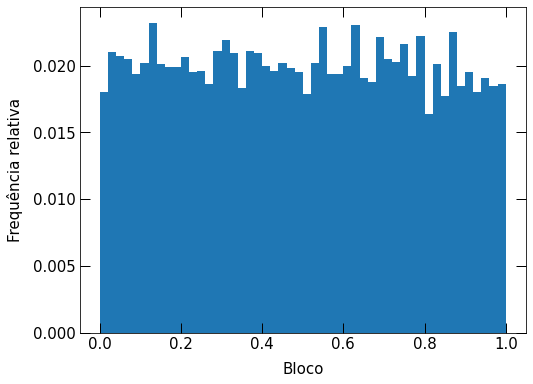

In [ ]:
# estabelecemos alguns parâmetros
n_bins=50
n_exemplos=10000

# definimos uma seed (igual à matricula) e geramos um conjunto x de númeors aleatórios
np.random.seed(93724)
x = rng.uniform(0.,1.,n_exemplos)

# plotar e salvar o histograma
plt.figure(figsize=(8,6))
hist = histograma(x, n_bins)
plt.savefig('hist1',dpi=300)

0.014974038896027098

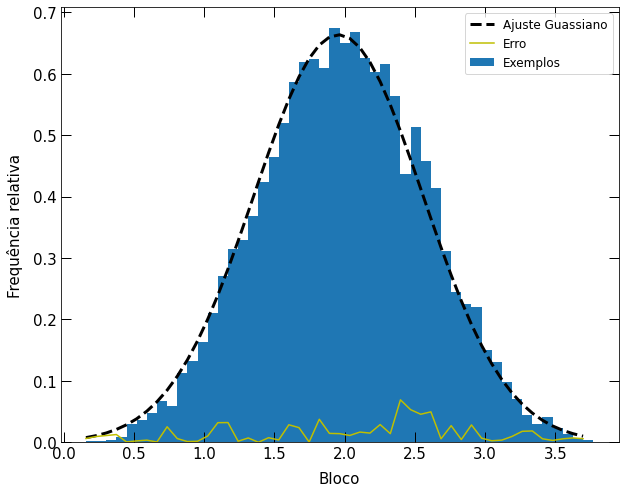

In [ ]:

def Prob(n_termos,n_it,n_bins,graph=True):
  
# Cria uma lista de valores vazia, realiza a soma de n_termos números aleatórios, n_it vezes e a cada iteração adiciona o valor obtido à lista
  dist=[]
  for n in range(n_it):
    soma = np.sum(rng.uniform(size=n_termos))
    dist.append(soma)
 
# Aplica a função histograma à lista de valores
  hist  = plt.hist(dist,bins=n_bins,density=True)
  plt.close()

# Faz o fit gaussiano, começamos com um chute da média e variância da distribuição , o fit em si é gerado pela gunção curve_fit que retorna os valores ajustados da média e variância
  mean = np.mean(dist)
  var = np.var(dist)
  x = np.array(hist[1][0:-1])
  y = np.array(hist[0])
  f_gaussiana = lambda x,mean,var: norm.pdf(x, mean,var)
  parametros_gaussiana = curve_fit(f_gaussiana,x,y,p0=[mean,var])
  p = norm.pdf(x,parametros_gaussiana[0][0],(parametros_gaussiana[0][1]))

# Calcula o erro relativo
  erro = np.abs(hist[0] - p)

# Plota o gráfico
  if graph:
     plt.figure(figsize=(10,8))
     plt.tick_params(direction='in',which='minor',length=5, width = 1 , right = 'on' , top = 'on')
     plt.tick_params(direction='in',length=10, width = 1 , right = 'on' , top = 'on')
     plt.hist(dist,density=1,bins=n_bins,label=f"Exemplos")
     plt.plot(x, p, color='k',ls='--', linewidth=3,label='Ajuste Guassiano')
     plt.plot(x,erro,'y',label='Erro')
     plt.rcParams['legend.fontsize'] = 12
     plt.rcParams['font.size'] = 15
     plt.legend()
     plt.xlabel('Bloco',labelpad=10)
     plt.ylabel('Frequência relativa',labelpad=10)
     plt.savefig(f'hist_{n_termos}_termos',dpi=300)
  return np.sum(erro)/n_bins

Prob(4,10000,50,graph=True)




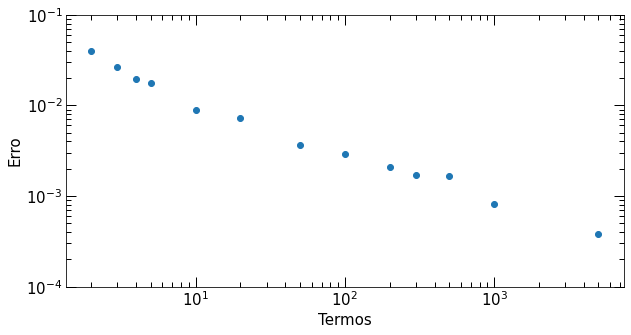

In [ ]:
def erro(n_it,n_bins):
  erro=[]
  termos=[2,3,4,5,10,20,50,100,200,300,500,1000,5000]

# Usamos a função definida acima para calcular os erros relaivos com uma série de termos
  for i in termos:
    err=Prob(i,n_it,n_bins,graph=False)
    erro.append(err)

# Plotamos os resultados
  plt.figure(figsize=(10,5))
  plt.tick_params(direction='in',length=10, width = 1 , right = 'on' , top = 'on')
  plt.tick_params(direction='in',which='minor',length=5, width = 1 , right = 'on' , top = 'on')
  plt.scatter(termos,erro,label="erro")
  plt.yscale('log')
  plt.xscale('log')
  plt.ylim((1e-4,1e-1))
  plt.xlabel('Termos')
  plt.ylabel('Erro')
  plt.rcParams['legend.fontsize'] = 12
  plt.rcParams['font.size'] = 15
  plt.savefig('erro1',dpi=300)
  return

erro(10000,100)